# 2. Car Rental [10 pts]

#### by Roumen Guha, on Sunday, February 19th, 2017


A small car rental company has a fleet of 94 vehicles distributed among its 10 agencies. The location of every agency is given by its geographical coordinates x and y in a grid based on miles. We assume that the road distance between agencies is approximately 1.3 times the Euclidean distance (as the crow flies). The following table indicates the coordinates of all agencies, the number of cars required the next morning, and the stock of cars in the evening preceding this day.

<img src="2.png">

Supposing the cost for transporting a car is $0.50 per mile, determine the movements of cars that allow the company to re-establish the required numbers of cars at all agencies, minimizing the total cost incurred for transport.

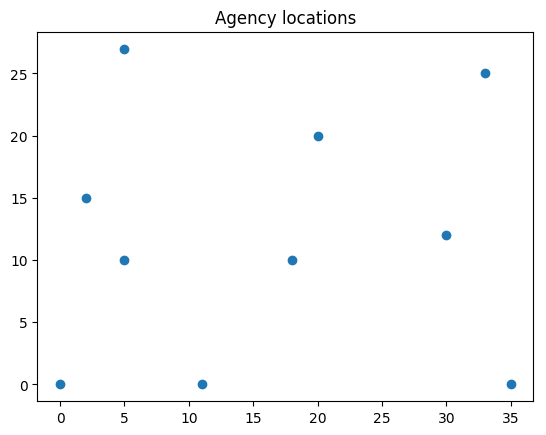

PyObject <matplotlib.text.Text object at 0x0000000028ED4438>

In [6]:
using NamedArrays, PyPlot

agencies = [1:10;]

coords =  [ 0 20 18 30 35 33  5  5 11  2
            0 20 10 12  0 25 27 10  0 15 ]

carsReq = [10  6  8 11  9  7 15  7  9 12]

carsPres = [8 13  4  8 12  2 14 11 15  7]

distMultiplier = 1.3
mileCost       = 0.5 # dollars
;

scatter(coords[1,:], coords[2,:])
title("Agency locations")

In [101]:
displacements = zeros(10,10)

for source = 1:10
    for destination = 1:10
        # displacement = sqrt((x2 - x1)^2 + (y2 - y1)^2)
        displacements[source,destination] =  sqrt((coords[1,destination] - coords[1,source])^2 + (coords[2,destination] - coords[2,source])^2)
    end
end

distances = displacements * distMultiplier
costs = distances * mileCost
;

In [102]:
using JuMP

m = Model()

# movements[i,j] is the number of cars shipped from agency i to agency j
@variable(m, movements[agencies, agencies] >= 0)

# each agency must have as many cars as they require the next moring
@constraint(m, present[j in agencies], sum(movements[i,j] for i in agencies) == carsReq[j])
@constraint(m, required[i in agencies], sum(movements[i,j] for j in agencies) == carsPres[i])
                        
@objective(m, Min, sum(movements[i,j]*costs[i,j] for i in agencies, j in agencies))
                                    
status = solve(m)

:Optimal

In [103]:
raw = Int[getvalue(movements[i, j]) for i in agencies, j in agencies]
solution = NamedArray(raw, (agencies, agencies), ("from", "to"))

10×10 Named Array{Int64,2}
from ╲ to │  1   2   3   4   5   6   7   8   9  10
──────────┼───────────────────────────────────────
1         │  8   0   0   0   0   0   0   0   0   0
2         │  0   6   1   0   0   5   1   0   0   0
3         │  0   0   4   0   0   0   0   0   0   0
4         │  0   0   0   8   0   0   0   0   0   0
5         │  0   0   0   3   9   0   0   0   0   0
6         │  0   0   0   0   0   2   0   0   0   0
7         │  0   0   0   0   0   0  14   0   0   0
8         │  0   0   0   0   0   0   0   6   0   5
9         │  2   0   3   0   0   0   0   1   9   0
10        │  0   0   0   0   0   0   0   0   0   7

In [105]:
for j = 1:10
    for i = 1:10
        if movement[i,j] >= 1e-5
            if i != j
                print(Int(movement[i,j]))
                println(" car(s) moved to agency ", j, " (from agency ", i, ")")
            end
        end
    end
end

println()
println("The total cost will be \$", getobjectivevalue(m))

2 car(s) moved to agency 1 (from agency 9)
1 car(s) moved to agency 3 (from agency 2)
3 car(s) moved to agency 3 (from agency 9)
3 car(s) moved to agency 4 (from agency 5)
5 car(s) moved to agency 6 (from agency 2)
1 car(s) moved to agency 7 (from agency 2)
1 car(s) moved to agency 8 (from agency 9)
5 car(s) moved to agency 10 (from agency 8)

The total cost will be $152.63901632295628


In [106]:
println(m)

Min 18.38477631085024 movements[1,2] + 13.384319183283102 movements[1,3] + 21.002142747824564 movements[1,4] + 22.75 movements[1,5] + 26.91031400782979 movements[1,6] + 17.84838928306978 movements[1,7] + 7.267220926874317 movements[1,8] + 7.15 movements[1,9] + 9.836284867774012 movements[1,10] + 18.38477631085024 movements[2,1] + 6.62872536767062 movements[2,3] + 8.324061508662703 movements[2,4] + 16.25 movements[2,5] + 9.053452380169677 movements[2,6] + 10.759414482210452 movements[2,7] + 11.718041645257966 movements[2,8] + 14.255612929649851 movements[2,9] + 12.143002099975114 movements[2,10] + 13.384319183283102 movements[3,1] + 6.62872536767062 movements[3,2] + 7.907591289387685 movements[3,4] + 12.820003900155413 movements[3,5] + 13.788582233137678 movements[3,6] + 13.910607463371253 movements[3,7] + 8.450000000000001 movements[3,8] + 7.934261150226907 movements[3,9] + 10.895985499256138 movements[3,10] + 21.002142747824564 movements[4,1] + 8.324061508662703 movements[4,2] + 7.907